In [13]:
#%pip install geopandas
#%pip install folium
#%pip install shapely

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from copy_repo_funciones import *
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### SHAPELY 

In [14]:
from shapely.geometry import Point, Polygon

In [29]:
geo=gpd.read_file('../FINAL/RAW/GEOREF/georef-mexico-colonia/georef-mexico-colonia-millesime.shp')

In [30]:
geo.head()

,year,sta_code,sta_name,mun_code,mun_name,col_code,col_name,col_area_co,col_type,geometry
0,2022,['09'],['Ciudad de MÃ©xico'],['09002'],['Azcapotzalco'],['02-009'],['Coltongo'],MEX,colonia,"POLYGON ((-99.15595 19.48651, -99.15294 19.485..."
1,2022,['09'],['Ciudad de MÃ©xico'],['09003'],['CoyoacÃ¡n'],['03-006'],['Ampliacion Candelaria'],MEX,colonia,"POLYGON ((-99.15265 19.32581, -99.15336 19.326..."
2,2022,['09'],['Ciudad de MÃ©xico'],['09003'],['CoyoacÃ¡n'],['03-026'],['Croc Culhuacan Secc 6 (U Hab)'],MEX,colonia,"POLYGON ((-99.12251 19.32904, -99.12198 19.329..."
3,2022,['09'],['Ciudad de MÃ©xico'],['09003'],['CoyoacÃ¡n'],['03-072'],['Los Cipreses'],MEX,colonia,"POLYGON ((-99.12466 19.31520, -99.12491 19.315..."
4,2022,['09'],['Ciudad de MÃ©xico'],['09004'],['Cuajimalpa de Morelos'],['04-033'],['Lomas Del Chamizal'],MEX,colonia,"POLYGON ((-99.26654 19.38314, -99.26658 19.383..."


In [31]:
capt_22=pd.read_csv('../FINAL/RAW/SCALL/scall_2022.csv')

In [37]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point


# Iterate over capt_total
for index, row in capt_22.iterrows():
    lat = row['latitud']
    lon = row['longitud']
    
    # Create a Point object from the latitude and longitude coordinates
    point = Point(lon, lat)
    
    # Initialize the 'Colonia name' for the current row
    colonia_name = None
    
    # Iterate over the polygons to check if the point is inside any polygon
    for _, polygon in geo.iterrows():
        # Check if the point is inside the polygon
        if polygon['geometry'].contains(point):
            # Assign the 'Colonia name' for the current row
            colonia_name = polygon['col_name']
            break  # Exit the loop if a match is found
    
    # Assign the 'Colonia name' to the current row in capt_total
    capt_22.at[index, 'Colonia name'] = colonia_name


In [38]:
capt_22['Colonia name'].value_counts()

Colonia name
['San Antonio Tecomitl (Pblo)']                          1736
['Villa Milpa Alta (Pblo)']                              1736
['Santa Ana Tlacotenco (Pblo)']                          1048
['San Pablo Oztotepec (Pblo)']                            872
['San Salvador Cuauhtenco (Pblo)']                        813
                                                         ... 
['El Eden']                                                 1
['Degollado Chico']                                         1
['Ejto Constitucionalista', 'Supermanzana I (U Hab)']       1
['Castillo Chico']                                          1
['Fuego Nuevo']                                             1
Name: count, Length: 262, dtype: int64

In [55]:
capt_22.to_csv('../FINAL/RAW/SCALL/scall_2022_col.csv')

In [39]:
nancolsper(capt_22)

alcaldia         6.06
colonia_datos    6.06
Colonia name     0.70
dtype: float64

In [1]:
#col_unique_counts(capt_22,'Colonia name')

In [2]:
#capt_22.loc[capt_22['Colonia name']=="['San Salvador Cuauhtenco (Pblo)']"]

In [3]:
#col_unique_counts(capt_22, 'Colonia name')

## Explorando archivo de contaminación

In [21]:
geo=gpd.read_file('../FINAL/RAW/contaminacin-de-agua-en-la-ciudad-de-mxico-.json')

In [33]:
geo.head()

,ID,GRIDCODE,Valores,geometry
0,1,2,0.168035 - 0.494131,"POLYGON ((-99.22138 19.29803, -99.22709 19.298..."
1,2,2,0.168035 - 0.494131,"POLYGON ((-99.16045 19.27822, -99.16711 19.278..."
2,3,1,0.001938 - 0.168035,"POLYGON ((-99.34506 19.27073, -99.34519 19.332..."
3,4,0,NaN,"POLYGON ((-99.05965 19.51596, -99.00723 19.515..."
4,5,0,NaN,"POLYGON ((-99.21275 19.24563, -99.34501 19.245..."


In [30]:
contAlta= geo[geo['GRIDCODE']==2]
contMedia=geo[geo['GRIDCODE']==1]

In [39]:
style_function1 = lambda x: {'fillColor': 'red', 'color': 'red'}
style_function2 = lambda x: {'fillColor': 'orange', 'color': 'orange'}

In [25]:
mexico_city_coords = [19.4326, -99.1332]  # Coordinates of Mexico City
m = folium.Map(location=mexico_city_coords, zoom_start=10)


In [40]:
for _, row in contAlta.iterrows():
    folium.GeoJson(row.geometry, style_function=style_function1).add_to(m)

for _, row in contMedia.iterrows():
    folium.GeoJson(row.geometry, style_function=style_function2).add_to(m)


In [41]:
m

## Archivo Kernell (contaminación)

Determinando diferencias con el de arriba, OK ES EL MISMO!

In [49]:
kernell=gpd.read_file('../FINAL/RAW/contaminacion/kernel_agua.shp')

In [50]:
kernell.head()

,ID,GRIDCODE,Valores,geometry
0,1,2,0.168035 - 0.494131,"POLYGON ((476741.123 2133819.673, 476141.123 2..."
1,2,2,0.168035 - 0.494131,"POLYGON ((483141.123 2131619.673, 482441.123 2..."
2,3,1,0.001938 - 0.168035,"POLYGON ((463741.123 2130819.673, 463741.123 2..."
3,4,0,NaN,"POLYGON ((493741.123 2157919.673, 499241.123 2..."
4,5,0,NaN,"POLYGON ((477641.123 2128019.673, 463741.123 2..."


## Tandeo


In [3]:
tandeo=gpd.read_file('../FINAL/RAW/TANDEO/tandeo2019/tandeo2019.shp')

In [7]:
tandeo.tail()

,ID,ENTIDAD,MUNICIPIO,NOMBRE,DELEGACIO,tnd_2019,geometry
2394,604,9,16,DEPORTIVA PENSIL,MIGUEL HIDALGO,no,"POLYGON ((-99.19972 19.45254, -99.19922 19.452..."
2395,1633,9,12,SANTISIMA TRINIDAD,TLALPAN,si,"POLYGON ((-99.18858 19.27338, -99.18708 19.272..."
2396,605,9,16,5 DE MAYO,MIGUEL HIDALGO,no,"POLYGON ((-99.19974 19.45038, -99.19876 19.450..."
2397,1634,9,12,TEPETONGO,TLALPAN,si,"POLYGON ((-99.18948 19.27203, -99.18944 19.272..."
2398,NaN,NaN,NaN,NaN,TLÃHUAC,no,None


<Axes: >

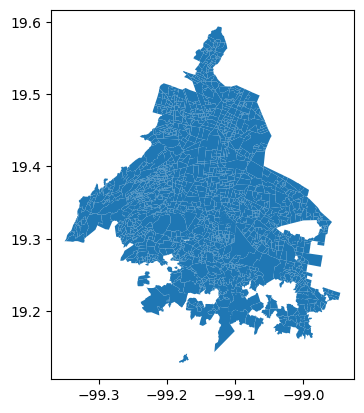

In [15]:
tandeo.plot()

In [16]:
subset = tandeo[tandeo['tnd_2019'] == 'si']

<Axes: >

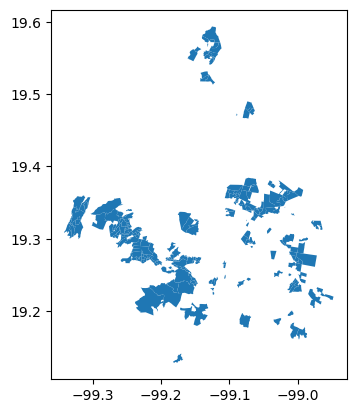

In [17]:
subset.plot()

## Riesgos

In [13]:
riesgos=gpd.read_file('../FINAL/RAW/RIESGOS/sintesis_riesgos.shp')

In [14]:
riesgos.head()

,OBJECTID,R_G1,R_H1,R_H2,R_H3,R_G2,SUMATORIA,geometry
0,1,NaN,NaN,NaN,NaN,Inestabilidad de laderas,1,"MULTIPOLYGON (((481202.577 2115603.035, 481202..."
1,2,NaN,NaN,NaN,Sequia,NaN,1,"MULTIPOLYGON (((493721.142 2106741.000, 493721..."
2,3,NaN,NaN,NaN,Sequia,Inestabilidad de laderas,2,"MULTIPOLYGON (((486401.142 2164805.490, 486401..."
3,4,NaN,NaN,NaN,Sequia,Inestabilidad de laderas,3,"MULTIPOLYGON (((500901.142 2119801.000, 500896..."
4,5,NaN,NaN,Olas de calor,NaN,NaN,1,"MULTIPOLYGON (((500841.142 2119421.000, 500841..."


In [18]:
sequia= riesgos[riesgos['R_H3']=='Sequia']

<Axes: >

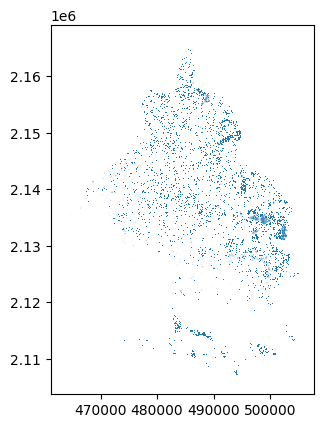

In [19]:
sequia.plot()

## Consumo promedio habitacional DOMESTICO

-  **cve_ent** -> Clave entidad federativa
-  **cve_col** -> Clave colonia
-  **Frequency** -> ??
-  **SUM_cons_t** -> Suma del consumo total de agua por colonia (m3) por bimestre
-  **MEAN_cons_** -> Promedio de consumo total de colonia (m3) por bimestre
-  **VIV2010**  -> "Vivienda censo 2010
-  **PROMVIVCON** -> Promedio de consumo total de agua de la colonia por número de
viviendas
- **C_PROMVIVC** -> Campo reclasificado en cuantiles en 5 rangos a partir de
"PROMVIVCON"; donde el valor "5" corresponde a un consumo de agua
muy alto, mientras que el número "1" a un consumo bajo

In [3]:
consumo=gpd.read_file('../FINAL/RAW/CONSUMO/consumo_hab_prom_agua_col/Consumo_hab_prom_agua_col.shp')

In [4]:
consumo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cve_ent     1814 non-null   object  
 1   alcaldia    1814 non-null   object  
 2   cve_col     1814 non-null   object  
 3   colonia     1814 non-null   object  
 4   OBJECTID    1815 non-null   int64   
 5   FREQUENCY   1815 non-null   int64   
 6   SUM_cons_t  1815 non-null   float64 
 7   MEAN_cons_  1815 non-null   float64 
 8   VIV2010     1815 non-null   int64   
 9   PROMVIVCON  1815 non-null   float64 
 10  C_PROMVIVC  1815 non-null   int64   
 11  geometry    1815 non-null   geometry
dtypes: float64(3), geometry(1), int64(4), object(4)
memory usage: 170.3+ KB


In [5]:
def plot_value_counts(df, column):
    # Count the unique values in the specified column
    value_counts = df[column].value_counts()

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Count of Unique Values in {column} Column')
    plt.xticks(rotation=45)
    plt.show()

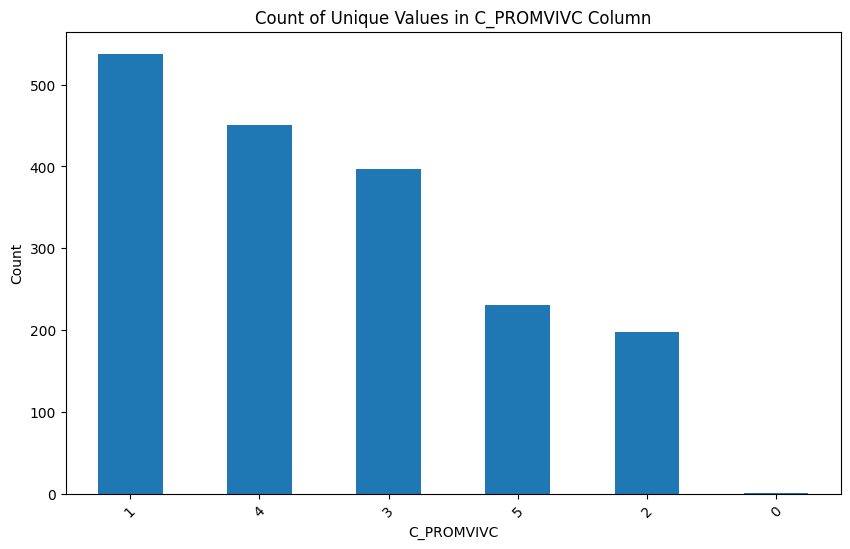

In [7]:
plot_value_counts(consumo, 'C_PROMVIVC')

In [10]:
col_unique_counts(consumo, 'colonia')

,colonia,Count
0,LA JOYA,4
1,MIGUEL HIDALGO,4
2,LA ASUNCION (BARR),3
3,FRANCISCO VILLA,3
4,EL RODEO,3
...,...,...
1738,MAXIMINO AVILA CAMACHO,1
1739,MARTIRES DE RIO BLANCO (AMPL),1
1740,MARTIRES DE RIO BLANCO,1
1741,MARTIN CARRERA II,1


## OTHERS

In [8]:
import pandas as pd

# Create a sample DataFrame
data = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})

# Get the column at index 0
column_0 = data.iloc[:, 0]

# Print the values of the column
print(column_0)


0    1
1    2
2    3
Name: A, dtype: int64


In [12]:
data.iloc[:, 2]

0    7
1    8
2    9
Name: C, dtype: int64

## Archivo Censo

In [2]:
import pandas as pd

In [3]:
censo=pd.read_csv('../FINAL/CLEAN/TABLEAU/censo_grouped.csv')

In [7]:
censo.head()

,alcaldia,disponibilidad,fuente,poblacion
0,Azcapotzalco,no,Camion cisterna,2345
1,Azcapotzalco,no,De la lluvia,15
2,Azcapotzalco,no,De otra vivienda,293
3,Azcapotzalco,no,De un pozo particular,65
4,Azcapotzalco,no,Llave o pozo comunitario,860


In [8]:
col_unique_counts(censo, 'alcaldia')

,alcaldia,Count
0,Cuajimalpa de Morelos,8
1,Cuauhtemoc,8
2,Iztapalapa,8
3,La Magdalena Contreras,8
4,Milpa Alta,8
5,Tlalpan,8
6,Tlahuac,8
7,Xochimilco,8
8,Alvaro Obregon,8
9,Azcapotzalco,7


In [ ]:
#Se perdieron los acentos que tenemos que recuperar...once again

In [9]:
censo.loc[censo['alcaldia']=='Coyoacan', 'alcaldia']='Coyoacán'
censo.loc[censo['alcaldia']=='Alvaro Obregon', 'alcaldia']='Álvaro Obregón'
censo.loc[censo['alcaldia']=='Tlahuac', 'alcaldia']='Tláhuac'
censo.loc[censo['alcaldia']=='Benito Juarez', 'alcaldia']='Benito Juárez'
censo.loc[censo['alcaldia'] == 'Cuauhtemoc', 'alcaldia'] = 'Cuauhtémoc'
censo.loc[censo['alcaldia'] == 'Magdalena Contreras', 'alcaldia'] = 'La Magdalena Contreras'

In [10]:
col_unique_counts(censo, 'alcaldia')

,alcaldia,Count
0,Cuajimalpa de Morelos,8
1,Cuauhtémoc,8
2,Iztapalapa,8
3,La Magdalena Contreras,8
4,Milpa Alta,8
5,Tlalpan,8
6,Tláhuac,8
7,Xochimilco,8
8,Álvaro Obregón,8
9,Azcapotzalco,7


In [13]:
censo.to_csv('../FINAL/CLEAN/TABLEAU/censo_grouped.csv', index= False)

## Pobreza educativa

In [3]:
edu=pd.read_csv('../FINAL/CLEAN/Pobreza educativa alcaldias.csv"')

FileNotFoundError: [Errno 2] No such file or directory: '../FINAL/CLEAN/Pobreza educativa alcaldias.csv"'

In [39]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Alcaldia                16 non-null     object 
 1   % pob extrema           16 non-null     float64
 2   % pob moderada          16 non-null     float64
 3   % pobreza total         16 non-null     float64
 4   % total sin pobreza     16 non-null     float64
 5   poblacion pob extrema   16 non-null     int32  
 6   poblacion pob moderada  16 non-null     int32  
 7   poblacion pob total     16 non-null     int32  
 8   pob total sin pob       16 non-null     int32  
dtypes: float64(4), int32(4), object(1)
memory usage: 1.0+ KB


In [38]:
#edu['% pob extrema'] = edu['% pob extrema'].str.replace(',', '.').astype(float)
edu['% pob moderada'] = edu['% pob moderada'].str.replace(',', '.').astype(float)
edu['% pobreza total'] = edu['% pobreza total'].str.replace(',', '.').astype(float)
edu['% total sin pobreza'] = edu['% total sin pobreza'].str.replace(',', '.').astype(float)

In [32]:
#edu['poblacion pob extrema'] = edu['poblacion pob extrema'].str.replace('\u202f', '').astype(int)
edu['poblacion pob moderada'] = edu['poblacion pob moderada'].str.replace('\u202f', '').astype(int)
edu['poblacion pob total'] = edu['poblacion pob total'].str.replace('\u202f', '').astype(int)
edu['pob total sin pob'] = edu['pob total sin pob'].str.replace('\u202f', '').astype(int)

In [40]:
edu.head()

,Alcaldia,% pob extrema,% pob moderada,% pobreza total,% total sin pobreza,poblacion pob extrema,poblacion pob moderada,poblacion pob total,pob total sin pob
0,Azcapotzalco,5.28,14.71,19.99,80.01,22720,63246,85966,343984
1,Coyoacán,4.55,11.69,16.24,83.76,27626,70951,98577,508239
2,Cuajimalpa de Morelos,7.81,16.68,24.50,75.50,16816,35914,52730,162529
3,Gustavo A. Madero,5.92,16.60,22.52,77.48,68747,192780,261527,899797
4,Iztacalco,5.33,14.63,19.96,80.04,21428,58873,80301,322070


In [42]:
edu.to_csv('../FINAL/CLEAN/TABLEAU/Pobreza educativa alcaldias.csv', index=False)